In [1]:
try:
  %tensorflow_version 2.x 
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [4]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [5]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [7]:
series = df['close'].values.reshape(-1, 1)

In [8]:
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [9]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1249, 10, 1) Y.shape (1249,)


In [10]:
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
20/20 [==============================] - 8s 35ms/step - loss: 0.2073 - val_loss: 0.2537
Epoch 2/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0124 - val_loss: 0.0515
Epoch 3/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0076 - val_loss: 0.0355
Epoch 4/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0060 - val_loss: 0.0898
Epoch 5/80
20/20 [==============================] - 0s 10ms/step - loss: 0.0059 - val_loss: 0.0327
Epoch 6/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0060 - val_loss: 0.0376
Epoch 7/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0062 - val_loss: 0.0804
Epoch 8/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0073 - val_loss: 0.0327
Epoch 9/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0067 - val_loss: 0.0334
Epoch 10/80
20/20 [==============================] - 0s 10ms/step - loss: 0.0067 - val_loss: 0.0356
Epoch 11/80
20/2

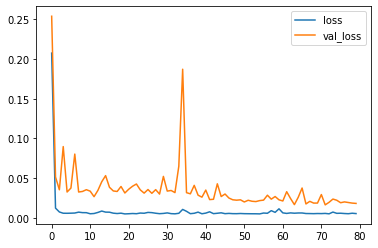

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(1249, 1)


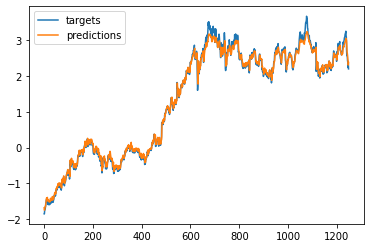

In [12]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

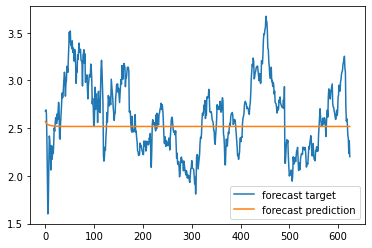

In [13]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2] 

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  

  validation_predictions.append(p)
  

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [14]:

df['PrevClose'] = df['close'].shift(1) 


In [16]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [17]:

df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']

In [18]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


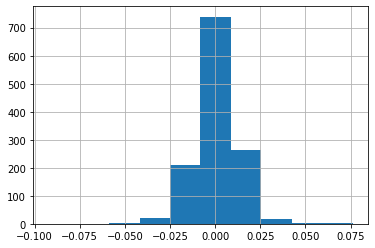

In [19]:
df['Return'].hist()

In [20]:
series = df['Return'].values[1:].reshape(-1, 1)


scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [21]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1248, 10, 1) Y.shape (1248,)


In [22]:
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)


r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
20/20 [==============================] - 3s 34ms/step - loss: 1.0231 - val_loss: 1.1476
Epoch 2/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9959 - val_loss: 1.1358
Epoch 3/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9896 - val_loss: 1.1421
Epoch 4/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9847 - val_loss: 1.1368
Epoch 5/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9866 - val_loss: 1.1404
Epoch 6/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9837 - val_loss: 1.1384
Epoch 7/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9835 - val_loss: 1.1486
Epoch 8/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9874 - val_loss: 1.1369
Epoch 9/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9837 - val_loss: 1.1550
Epoch 10/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9825 - val_loss: 1.1435
Epoch 11/80
20/20 

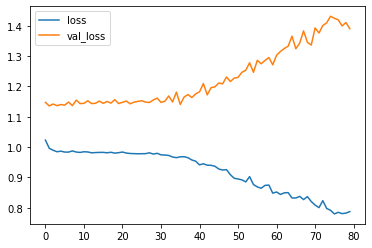

In [23]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(1248, 1)


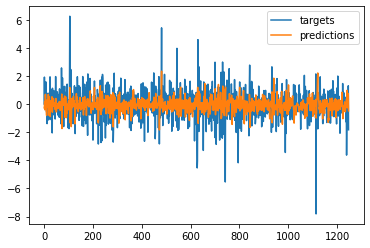

In [24]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

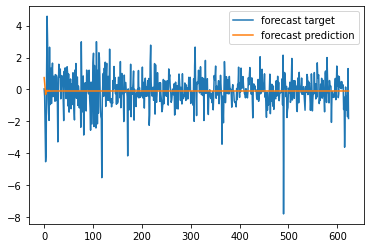

In [25]:

validation_target = Y[-N//2:]
validation_predictions = []


last_x = X[-N//2] 

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [26]:
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values

In [28]:

T = 10 
D = input_data.shape[1]
N = len(input_data) - T 

In [29]:

Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T - 1])
input_data = scaler.transform(input_data)

In [30]:
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [31]:
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)

for u in range(N - Ntrain):
  t = u + Ntrain
  X_test[u, :, :] = input_data[t:t+T]
  Y_test[u] = (targets[t+T] > 0)

In [32]:
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.001),
  metrics=['accuracy'],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [33]:
r = model.fit(
  X_train, Y_train,
  batch_size=32,
  epochs=300,
  validation_data=(X_test, Y_test),
)

Epoch 1/300
27/27 [==============================] - 3s 29ms/step - loss: 0.6954 - accuracy: 0.4970 - val_loss: 0.6946 - val_accuracy: 0.4780
Epoch 2/300
27/27 [==============================] - 0s 9ms/step - loss: 0.6929 - accuracy: 0.5113 - val_loss: 0.6971 - val_accuracy: 0.4878
Epoch 3/300
27/27 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6941 - val_accuracy: 0.5024
Epoch 4/300
27/27 [==============================] - 0s 9ms/step - loss: 0.6910 - accuracy: 0.5292 - val_loss: 0.6922 - val_accuracy: 0.5098
Epoch 5/300
27/27 [==============================] - 0s 10ms/step - loss: 0.6897 - accuracy: 0.5256 - val_loss: 0.7028 - val_accuracy: 0.4854
Epoch 6/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6905 - accuracy: 0.5292 - val_loss: 0.6900 - val_accuracy: 0.5537
Epoch 7/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6907 - accuracy: 0.5292 - val_loss: 0.6960 - val_accuracy: 0.5049
Epoch 8/30

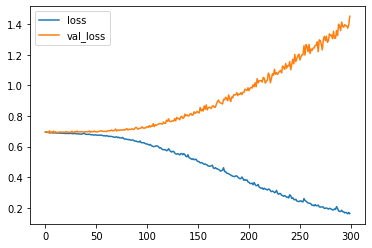

In [34]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

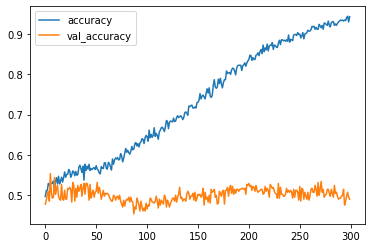

In [35]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()